In [21]:
import numpy as np
import matplotlib.pyplot as plt


In [96]:
def zeroFalsePosition(f, a, b, errMax=0.0001, itMax=100, plotSpeed=-1):
    if f(a)*f(b) > 0:
        raise Exception('Invalid input: f(a)*f(b) > 0!')

    if plotSpeed <= 0:
        return zeroFalsePositionNoPlot(f, a, b, errMax, itMax)
    
    return zeroFalsePositionPlot(f, a, b, errMax, itMax, plotSpeed)


def zeroFalsePositionNoPlot(f, a, b, errMax, itMax):
    for it in range(itMax):
        fA = f(a)
        fB = f(b)
        zero = b - fB*(b - a)/(fB - fA)

        fZero = f(zero)

        if abs(fZero) < errMax or abs(b - a) < errMax:
            return zero, it

        if fA*fZero < 0:
            b = zero
        else:
            a = zero

    return zero, it

def zeroFalsePositionPlot(f, a, b, errMax, itMax, plotSpeed):

    x = np.linspace(a, b, 100)
    fX = f(x)
    fMin = min(fX)
    fMax = max(fX)
    plt.plot(x, fX, 'b', [a, b], [0, 0], 'k')

    for it in range(itMax):
        fA = f(a)
        fB = f(b)
        zero = b - fB*(b - a)/(fB - fA)
        plt.plot([a, b], [fA, fB], 'r', zero, 0, 'rx')

        fZero = f(zero)
        
        plt.plot([zero, zero], [fMin, fMax], 'g', zero, fZero, 'og')

        if abs(fZero) < errMax or abs(b - a) < errMax:
            break

        plt.pause(1/plotSpeed)

        if fA*fZero < 0:
            b = zero
        else:
            a = zero
            
        plt.plot([zero, zero], [fMin, fMax], 'r', zero, fZero, 'og')

    plt.show()
    return zero, it + 1


In [23]:
def zeroBisection(f, a, b, errMax=0.001, itMax=100, plotSpeed=-1):
    if f(a)*f(b) > 0:
        raise Exception('Invalid parameters: f(a)*f(b) > 0!')

    if plotSpeed <= 0:
        return zeroBisectionNoPlot(f, a, b, errMax, itMax)

    return zeroBisectionPlot(f, a, b, errMax, itMax, plotSpeed)

def zeroBisectionNoPlot(f, a, b, errMax, itMax):
    for it in range(itMax):
        zero = (a + b)/2
        fZero = f(zero)

        if abs(fZero) < errMax or abs(b - a) < errMax:
            return zero, it + 1
        
        if f(a)*fZero < 0:
            b = zero
        else:
            a = zero

    return zero, it + 1

def zeroBisectionPlot(f, a, b, errMax, itMax, plotSpeed):

    x = np.linspace(a, b, 100)
    fX = f(x)
    fMin = min(fX)
    fMax = max(fX)

    plt.plot(x, fX, 'b', [a, b], [0, 0], 'k')
    plt.plot([a, a], [fMin, fMax], 'r', [b, b], [fMin, fMax], 'r')

    for it in range(itMax):
        zero = (a + b)/2
        fZero = f(zero)

        plt.plot([zero, zero], [fMin, fMax], 'g', zero, fZero, 'go')

        if abs(fZero) < errMax or abs(b - a) < errMax:
            break

        plt.pause(1/plotSpeed)
        
        if f(a)*fZero < 0:
            b = zero
        else:
            a = zero

        plt.plot([zero, zero], [fMin, fMax], 'r', zero, fZero, 'ro')

    plt.show()
    return zero, it

In [24]:
def zeroNewton(f, df, x0, errMax=0.0001, itMax=100, plotSpeed=-1, plotA=-5, plotB=5):
    if df(x0) == 0:
        raise('Invalid input: df(x0) == 0!')
    
    if plotSpeed <= 0:
        return zeroNewtonNoPlot(f, df, x0, errMax, itMax)
    
    return zeroNewtonPlot(f, df, x0, errMax, itMax, plotSpeed, plotA, plotB)


def zeroNewtonNoPlot(f, df, x0, errMax, itMax):

    for it in range(itMax):
        zero = x0 - f(x0)/df(x0)

        fZero = f(zero)
        if abs(fZero) < errMax:
            return zero, it + 1
        
        x0 = zero

    return zero, it + 1

def zeroNewtonPlot(f, df, x0, errMax, itMax, plotSpeed, plotA, plotB):
    
    x = np.linspace(plotA, plotB, 100)

    fX = f(x)
    fMin = min(fX)
    fMax = max(fX)
    plt.plot(x, fX, 'b', [plotA, plotB], [0, 0], 'k')

    for it in range(itMax):
        fX0 = f(x0)
        zero = x0 - fX0/df(x0)

        plt.plot([x0, zero], [fX0, 0], 'r', zero, 0, 'rx')

        fZero = f(zero)
        plt.plot([zero, zero], [fMin, fMax], 'g', zero, fZero, 'go')

        if np.abs(fZero) < errMax:
            break
        plt.pause(1/plotSpeed)
        
        x0 = zero

        plt.plot([zero, zero], [fMin, fMax], 'r', zero, fZero, 'ro')
        
    plt.show()
    return zero, it + 1

In [25]:
def zeroSecant(f, a, b, errMax, itMax, plotSpeed):

    if f(a) == f(b):
        raise Exception('Invalid parameters: f(a) == f(b)!')

    if plotSpeed <= 0:
        return zeroSecantNoPlot(f, a, b, errMax, itMax)
    
    return zeroSecantPlot(f, a, b, errMax, itMax, plotSpeed)


def zeroSecantNoPlot(f, a, b, errMax, itMax):
    for i in range(itMax):
        fA = f(a)
        fB = f(b)
        zero = b - fB*(b - a)/(fB - fA)

        fZero = f(zero)

        if abs(fZero) < errMax:
            return zero, i + 1
        
        a = b
        b = zero

    return zero, i + 1

def zeroSecantPlot(f, a, b, errMax, itMax, plotSpeed):
    
    x = np.linspace(a, b, 100)
    fX = f(x)
    fMin = np.min(fX)
    fMax = np.max(fX)

    plt.plot(x, fX, 'b', [a, b], [0, 0], 'k')

    for i in range(itMax):
        fA = f(a)
        fB = f(b)
        zero = b - fB*(b - a)/(fB - fA)
        plt.plot([a, b], [fA, fB], 'r', zero, 0, 'rx')

        fZero = f(zero)
        
        plt.plot([zero, zero], [fMin, fMax], 'g', zero, fZero, 'og')

        if abs(fZero) < errMax:
            break
        
        plt.pause(1/plotSpeed)


        a = b
        b = zero

        plt.plot([zero, zero], [fMin, fMax], 'r', zero, fZero, 'og')

    plt.show()
    return zero, i + 1

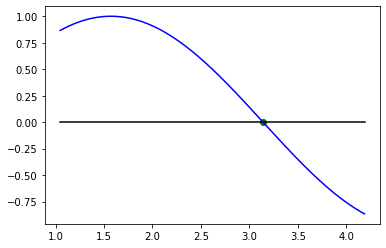

In [26]:
f= np.sin # uzmem sinus f
a=np.pi/3
b=4*np.pi/3
x=np.linspace(a,b,1000)
plt.plot([a,b], [0,0], 'black')

fx= f(x)
plt.plot(x, fx, 'blue')
zero, it = zeroFalsePosition(f,a,b,10^-5, 100, 0.0)
fZero=f(zero)
plt.scatter(zero, fZero, c='g')

plt.show()

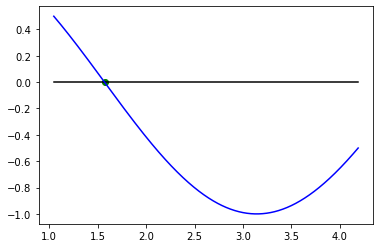

In [27]:
f= np.cos
a=np.pi/3
b=4*np.pi/3
x=np.linspace(a,b,1000)
plt.plot([a,b], [0,0], 'black')
fx= f(x)
plt.plot(x, fx, 'blue')
zero, it = zeroSecant(f, a, np.pi,0.01, 100, 0.0)
fZero=f(zero)
plt.scatter(zero, fZero, c='g')


plt.show()

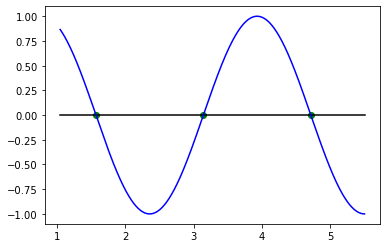

In [29]:
def f(x): 
   return 2*np.sin(x) * np.cos(x)
a=np.pi/3
b=np.pi*7/4
x=np.linspace(a,b,1000)
plt.plot([a,b], [0,0], 'black')
fx = f(x)

plt.plot(x, fx, 'blue')

zero, it = zeroFalsePosition(f,a,b,10^-5, 100, 0.0)
fZero=f(zero)
plt.scatter(zero, fZero, c='g')
aa=zero+0.1
zero, it = zeroSecant(f,aa,b,10**-5, 100, 0.0)
fZero=f(zero)
plt.scatter(zero, fZero, c='g')
aaa=zero+0.1
zero, it = zeroSecant(f,aaa,b,10**-5, 100, 0.0)
fZero=f(zero)
plt.scatter(zero, fZero, c='g')



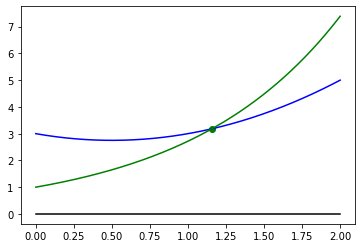

In [66]:
f = lambda x: x**2-x+3
g = lambda x: np.exp(x)

a=0
b=2
x=np.linspace(a,b,1000)
plt.plot([a,b], [0,0], 'black')
fx = f(x)
plt.plot(x, fx, 'blue')
gx = g(x)
plt.plot(x, gx, 'green')

raz = lambda x: f(x) - g(x)
presek, it = zeroSecant(raz,a,b,10**-5, 100, 0.0)
gpresek = g(presek)
plt.scatter(presek,gpresek, c='g')

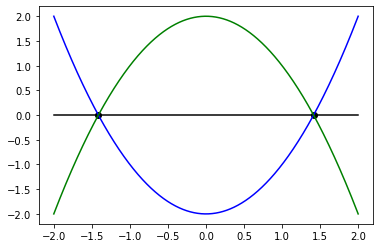

In [81]:
f = lambda x: x**2 - 2
g = lambda x: -(x**2) +2

a=-2
b=2
x=np.linspace(a,b,1000)
plt.plot([a,b], [0,0], 'black')
fx=f(x)
gx=g(x)
plt.plot(x,fx,'blue')
plt.plot(x,gx,'green')
jngdiff = lambda x: f(x)-g(x)
presek, it = zeroSecant(jngdiff, a, 0, 10**-5, 100, 0.0)
gpresek = g(presek)
plt.scatter(presek, gpresek, c='black')
presek, it = zeroSecant(jngdiff, 0, b, 10**-5, 100, 0.0)
gpresek = g(presek)
plt.scatter(presek, gpresek, c='black')

max =  0.5235987755982989
min =  5.759586531581288


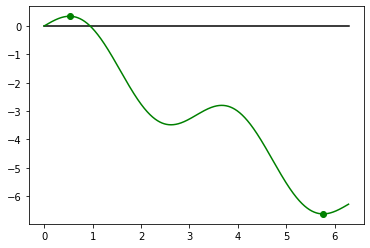

In [103]:
f = lambda x: 2*np.sin(x) * np.cos(x) - x
a= 0
b=2*np.pi
x=np.linspace(a,b,10000)
fx=f(x)
plt.plot([a,b], [0,0], 'black')
plt.plot(x, fx, 'green')
df = lambda x: 2*np.cos(2*x) - 1


max, it = zeroFalsePosition(df, 0, np.pi/2, 10^-5,100, 0.0)
print('max = ', max)
fMax = f(max)
plt.scatter(max, fMax, c='g')
min, it = zeroFalsePosition(df, 3*np.pi/2, 2*np.pi, 10^-5,100, 0.0)
print('min = ', min )
fMin = f(min)
plt.scatter(min, fMin, c='g')
plt.show()